**2602141032 - Kasandika Andariefli - LB09**

Genap & Laki-laki: Dataset C

# No.1 ML Modelling

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import  preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings


In [171]:
df=pd.read_csv("data_C.csv", index_col='id')
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
id,,,,,,,,,,,,,
157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41258 entries, 157138 to 154294
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       41258 non-null  int64  
 1   Surname          41258 non-null  object 
 2   CreditScore      41246 non-null  float64
 3   Geography        41258 non-null  object 
 4   Gender           41258 non-null  object 
 5   Age              41258 non-null  float64
 6   Tenure           41258 non-null  int64  
 7   Balance          41258 non-null  float64
 8   NumOfProducts    41258 non-null  int64  
 9   HasCrCard        41258 non-null  int64  
 10  IsActiveMember   41258 non-null  int64  
 11  EstimatedSalary  41258 non-null  float64
 12  churn            41258 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 4.4+ MB


In [173]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,4.125800e+04,41246.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000
mean,1.569218e+07,655.802890,38.165611,5.036308,55308.965471,1.556038,0.754011,0.496776,112507.486040,0.214455
std,7.136319e+04,79.736298,8.947665,2.817831,62795.530950,0.548029,0.430677,0.499996,50048.666663,0.410449
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563298e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74564.410000,0.000000
50%,1.569070e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117616.290000,0.000000
75%,1.575662e+07,710.000000,42.750000,7.000000,119785.395000,2.000000,1.000000,1.000000,154700.647500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


No minus values spotted

In [174]:
missing_values = df.isnull().sum()
print(missing_values)

CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64


The missing values will be addressed by the mean of x_train CreditScore after Data Splitting

## EDA

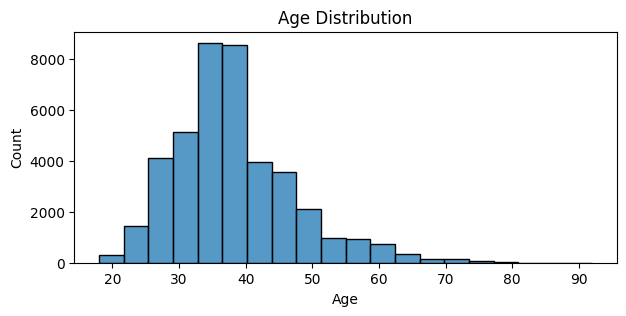

In [175]:
plt.figure(figsize=(7,3))
sns.histplot(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

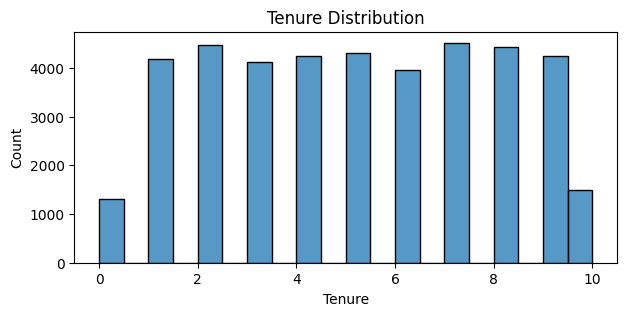

In [176]:
plt.figure(figsize=(7,3))
sns.histplot(df['Tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Tenure Distribution')
plt.show()

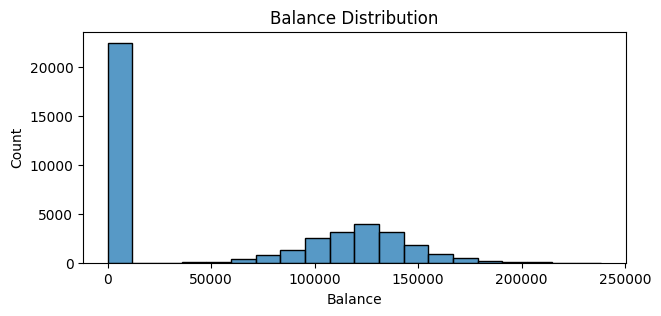

In [177]:
plt.figure(figsize=(7,3))
sns.histplot(df['Balance'], bins=20)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Balance Distribution')
plt.show()

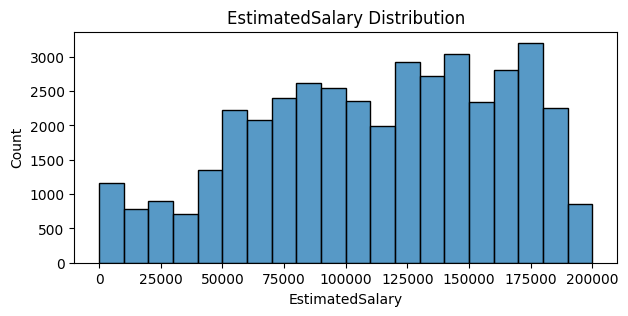

In [178]:
plt.figure(figsize=(7,3))
sns.histplot(df['EstimatedSalary'], bins=20)
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.title('EstimatedSalary Distribution')
plt.show()

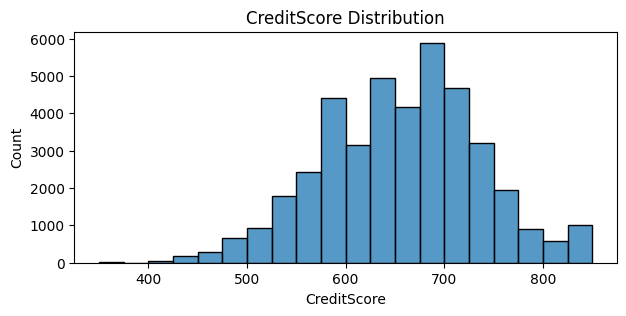

In [179]:
plt.figure(figsize=(7,3))
sns.histplot(df['CreditScore'], bins=20)
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.title('CreditScore Distribution')
plt.show()

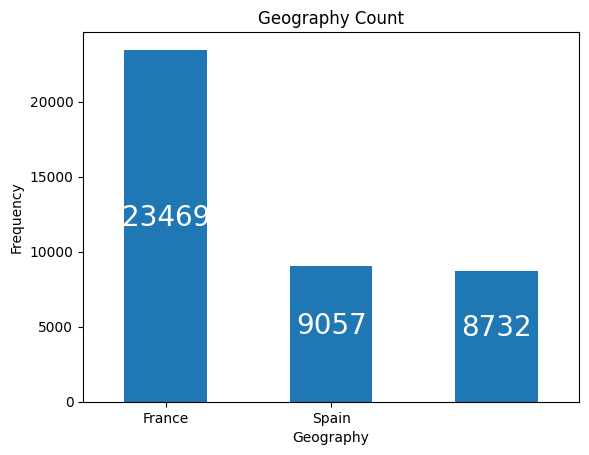

In [180]:
Geography = df['Geography'].value_counts()
Geography.plot.bar()
plt.title("Geography Count")
plt.ylabel("Frequency")
plt.xlabel("Geography")
plt.xticks([0,1],rotation=0)
plt.yticks()

for index , value in enumerate(Geography.to_list()):
  plt.text(index,value//2,str(Geography[index]),ha = 'center',size = 20,color = 'white')

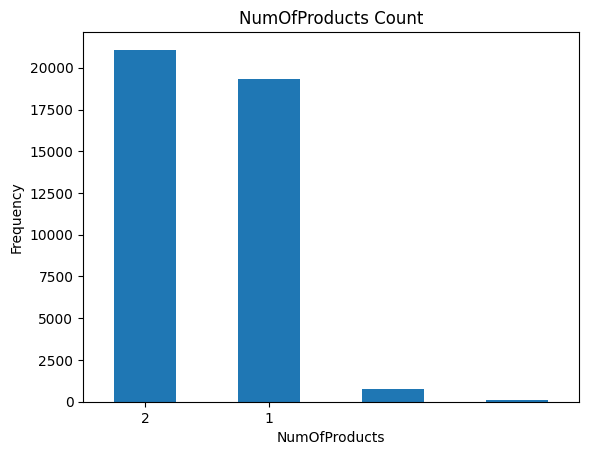

In [181]:
NumOfProducts = df['NumOfProducts'].value_counts()
NumOfProducts.plot.bar()
plt.title("NumOfProducts Count")
plt.ylabel("Frequency")
plt.xlabel("NumOfProducts")
plt.xticks([0,1],rotation=0)
plt.yticks()
plt.show()

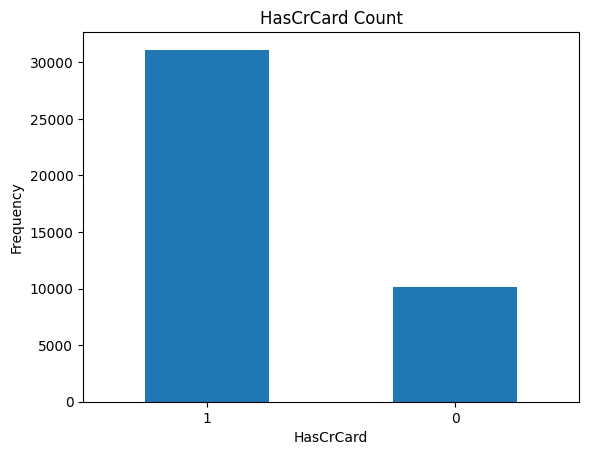

In [182]:
HasCrCard = df['HasCrCard'].value_counts()
HasCrCard.plot.bar()
plt.title("HasCrCard Count")
plt.ylabel("Frequency")
plt.xlabel("HasCrCard")
plt.xticks([0,1],rotation=0)
plt.yticks()
plt.show()

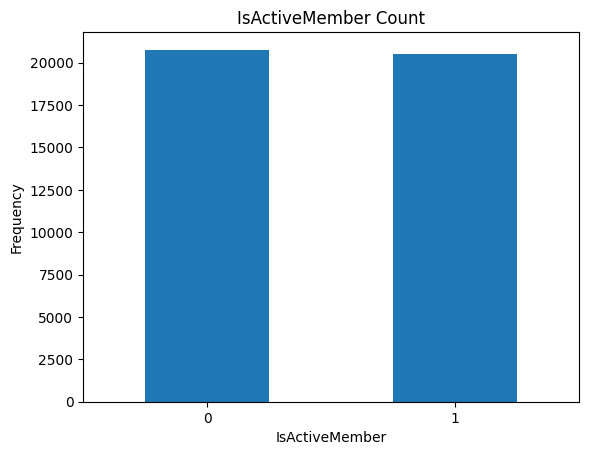

In [183]:
IsActiveMember = df['IsActiveMember'].value_counts()
IsActiveMember.plot.bar()
plt.title("IsActiveMember Count")
plt.ylabel("Frequency")
plt.xlabel("IsActiveMember")
plt.xticks([0,1],rotation=0)
plt.yticks()
plt.show()

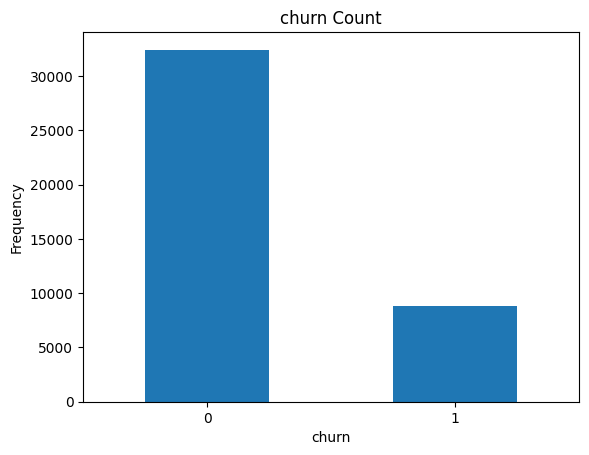

In [184]:
churn = df['churn'].value_counts()
churn.plot.bar()
plt.title("churn Count")
plt.ylabel("Frequency")
plt.xlabel("churn")
plt.xticks([0,1],rotation=0)
plt.yticks()
plt.show()

In [185]:
cat_cols = ['NumOfProducts','HasCrCard','IsActiveMember','churn']
cat_cols

['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn']

In [186]:

for column in cat_cols:
    print(f"Variable Name: {column}")
    print(f"Type: {type(df[column])}")
    print(f"Value: {df[column].value_counts()}")
    print()


Variable Name: NumOfProducts
Type: <class 'pandas.core.series.Series'>
Value: NumOfProducts
2    21080
1    19305
3      758
4      115
Name: count, dtype: int64

Variable Name: HasCrCard
Type: <class 'pandas.core.series.Series'>
Value: HasCrCard
1    31109
0    10149
Name: count, dtype: int64

Variable Name: IsActiveMember
Type: <class 'pandas.core.series.Series'>
Value: IsActiveMember
0    20762
1    20496
Name: count, dtype: int64

Variable Name: churn
Type: <class 'pandas.core.series.Series'>
Value: churn
0    32410
1     8848
Name: count, dtype: int64



## Colliniearity Check

In [187]:
df2=df.copy()
df2.head()

label_encoding = preprocessing.LabelEncoder()
df2['Surname']=label_encoding.fit_transform(df2['Surname'])
df2['Geography']=label_encoding.fit_transform(df2['Geography'])
df2['Gender']=label_encoding.fit_transform(df2['Gender'])
df_bin_encode={"Gender": {"Male":1,"Female" :0}}
df2=df2.replace(df_bin_encode)

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt


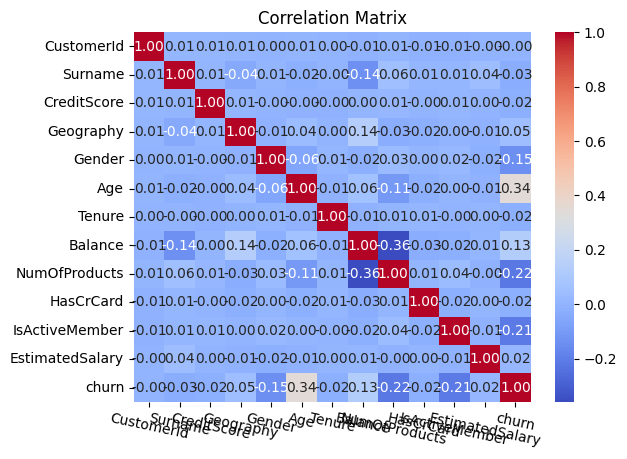

In [189]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.figure(figsize=(20, 20))
plt.title('Correlation Matrix')
plt.xticks(rotation=-12)
plt.show()

<Axes: >

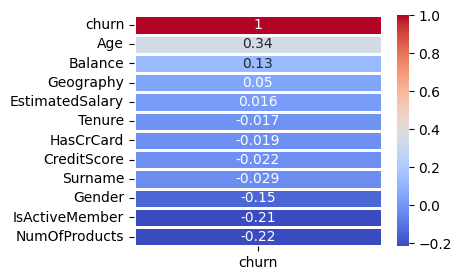

In [190]:
plt.figure(figsize = (4,3))
df2=df2.drop(['CustomerId'], axis=1)
sns.heatmap(df2.corr()[['churn']].sort_values(by = 'churn', ascending = False),
            linewidth = 1, annot=True, cmap='coolwarm')

**Removed Columns:**
- Surname: Doesn't make sense for this to have correlation
- Geography: We don't want nationality based bias

## Encoding
Gender: Male -> 1 and Female -> 0

## Data Splitting

In [191]:
dropped_col = ['CustomerId','Surname','churn']
x = df.drop(dropped_col,axis = 1)
y = df['churn']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [192]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33006, 10)
(8252, 10)
(33006,)
(8252,)


In [193]:
x_train=x_train.replace(df_bin_encode)
x_test=x_test.replace(df_bin_encode)

In [194]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Geography" column
x_train['Geography'] = label_encoder.fit_transform(x_train['Geography'])
x_test['Geography'] = label_encoder.fit_transform(x_test['Geography'])

In [195]:
# Assuming you have a DataFrame called 'df' and a column named 'column_name'
mean_value = x_train['CreditScore'].mean()
print(mean_value)


655.7789496014789


In [196]:
x_train.fillna(mean_value, inplace=True)
x_test.fillna(mean_value, inplace=True)

In [197]:
x_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [198]:
x_test.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Outlier Check

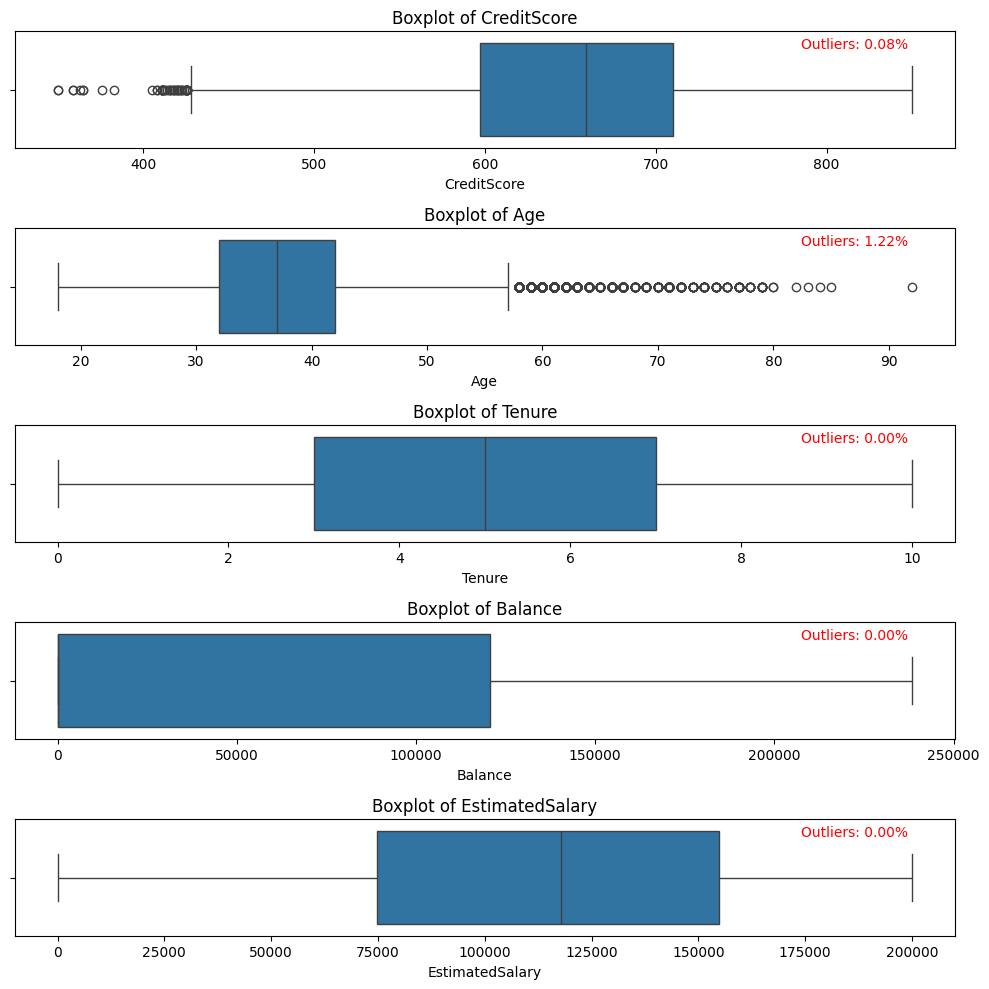

CreditScore: 0.08% outliers
Age: 1.22% outliers
Tenure: 0.00% outliers
Balance: 0.00% outliers
EstimatedSalary: 0.00% outliers


In [199]:
# Define the function to detect outliers using z-score
def detect_outliers_zscore(data):
    z_scores = np.abs(stats.zscore(data))
    return z_scores > 3

# Define the variables
variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Create a dictionary to store the outlier percentages
outlier_percentages = {}

# Create a figure and axes
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 2*len(variables)))

# Loop through each variable
for i, variable in enumerate(variables):
    # Create a boxplot
    sns.boxplot(x=x_train[variable], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {variable}')
    
    # Detect outliers using z-score
    outliers = detect_outliers_zscore(x_train[variable])
    
    # Calculate the percentage of outliers
    outlier_percentage = np.mean(outliers) * 100
    outlier_percentages[variable] = outlier_percentage
    
    # Add the percentage of outliers as text on the plot
    axes[i].text(0.95, 0.95, f'Outliers: {outlier_percentage:.2f}%', transform=axes[i].transAxes,
                 verticalalignment='top', horizontalalignment='right', fontsize=10, color='red')

# Show the plot
plt.tight_layout()
plt.show()

# Print the outlier percentages
for variable, percentage in outlier_percentages.items():
    print(f'{variable}: {percentage:.2f}% outliers')


## Scaling
After careful consideration:
- MinMax Scaling: EstimatedSalary
- Standard Scaling: Balance, CreditScore
- Robust Scaling: Age

Scaling

In [200]:
mmscale=x_train['EstimatedSalary']
mmscale=(np.array(mmscale)).reshape(-1,1)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(mmscale)
min_max_res=min_max_scaler.transform(mmscale)

In [201]:
print(min_max_res.min())
print(min_max_res.max())

0.0
1.0


In [202]:
x_train['EstimatedSalary']=min_max_res
x_train['EstimatedSalary'][0:3]

id
35702    0.359127
32549    0.649359
66558    0.208096
Name: EstimatedSalary, dtype: float64

In [203]:
# mmscale=x_test['EstimatedSalary']
# mmscale=(np.array(mmscale)).reshape(-1,1)
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(mmscale)
# min_max_res=min_max_scaler.transform(mmscale)

# x_test['EstimatedSalary']=min_max_res
# x_test['EstimatedSalary'][0:3]

In [204]:
ssscaler=x_train['Balance']
ssscaler=(np.array(ssscaler)).reshape(-1,1)
std_scaler = StandardScaler()
std_scaler.fit(ssscaler)

std_scaler_res=std_scaler.transform(ssscaler)

In [205]:
print(std_scaler_res.min())
print(std_scaler_res.max())

-0.885449138060943
2.9049590199609345


In [206]:
x_train['Balance']=std_scaler_res
x_train['Balance'][0:3]

id
35702   -0.885449
32549   -0.885449
66558    0.991224
Name: Balance, dtype: float64

In [207]:
# ssscaler=x_test['Balance']
# ssscaler=(np.array(ssscaler)).reshape(-1,1)
# std_scaler = StandardScaler()
# std_scaler.fit(ssscaler)

# std_scaler_res=std_scaler.transform(ssscaler)

# x_test['Balance']=std_scaler_res
# x_test['Balance'][0:3]

In [208]:
ssscaler=x_train['CreditScore']
ssscaler=(np.array(ssscaler)).reshape(-1,1)
std_scaler = StandardScaler()
std_scaler.fit(ssscaler)
std_scaler_res=std_scaler.transform(ssscaler)

In [209]:
print(std_scaler_res.min())
print(std_scaler_res.max())

-3.833540299575524
2.434942708446723


In [210]:
x_train['CreditScore']=std_scaler_res
x_train['CreditScore'][0:3]

id
35702    0.867822
32549    0.403954
66558    1.156172
Name: CreditScore, dtype: float64

In [211]:
# ssscaler=x_test['CreditScore']
# ssscaler=(np.array(ssscaler)).reshape(-1,1)
# std_scaler = StandardScaler()
# std_scaler.fit(ssscaler)
# std_scaler_res=std_scaler.transform(ssscaler)
# x_test['CreditScore']=std_scaler_res
# x_test['CreditScore'][0:3]

In [212]:
robscaler=x_train['Age']
robscaler=(np.array(robscaler)).reshape(-1,1)
rob_scaler = RobustScaler()
rob_scaler.fit(robscaler)
rob_scaler_res=rob_scaler.transform(robscaler)

In [213]:
print(rob_scaler_res.min())
print(rob_scaler_res.max())

-1.9
5.5


In [214]:
x_train['Age']=rob_scaler_res
x_train['Age'][0:3]

id
35702   -0.6
32549   -0.1
66558   -1.4
Name: Age, dtype: float64

In [215]:
# robscaler=x_test['Age']
# robscaler=(np.array(robscaler)).reshape(-1,1)
# rob_scaler = RobustScaler()
# rob_scaler.fit(robscaler)
# rob_scaler_res=rob_scaler.transform(robscaler)
# x_test['Age']=rob_scaler_res
# x_test['Age'][0:3]

In [216]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
35702,0.867822,2,0,-0.6,2,-0.885449,2,0,0,0.359127
32549,0.403954,2,1,-0.1,4,-0.885449,1,1,0,0.649359
66558,1.156172,0,0,-1.4,7,0.991224,1,0,1,0.208096
40643,0.566935,0,0,0.8,5,-0.885449,2,1,1,0.794761
127316,-0.824668,0,0,-1.4,5,0.925961,3,1,0,0.983986


In [217]:
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
152618,787.0,0,1,36.0,6,170840.08,1,0,1,101371.72
68411,735.0,0,1,30.0,2,0.00,2,1,1,132908.07
32608,711.0,0,0,58.0,4,0.00,1,1,1,119110.03
65815,691.0,2,1,33.0,5,0.00,2,1,0,2010.98
149392,574.0,2,1,37.0,7,128061.00,1,1,0,62375.10


In [218]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33006, 10)
(8252, 10)
(33006,)
(8252,)


## Random Forest

In [219]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the random forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on your training data
rf_classifier.fit(x_train, y_train)

# Make predictions on new data
y_pred = rf_classifier.predict(x_test)


In [220]:
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=3)
RF_class.fit(x_train, y_train)

y_predict=RF_class.predict(x_test)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6431
           1       0.51      0.59      0.55      1821

    accuracy                           0.79      8252
   macro avg       0.70      0.72      0.70      8252
weighted avg       0.80      0.79      0.79      8252



In [221]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,3,4],
}

RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 4}
Accuracy : 0.8452703571255326


In [222]:
RF_class_best = RandomForestClassifier(criterion= 'entropy',max_depth=4)
RF_class_best.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [223]:
y_predict_best=RF_class_best.predict(x_test)
print('\nClassification Random Forest (Tuned)\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Random Forest (Tuned)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6431
           1       0.55      0.59      0.57      1821

    accuracy                           0.80      8252
   macro avg       0.72      0.73      0.72      8252
weighted avg       0.81      0.80      0.81      8252



## XGBoost Classifier

In [224]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate = 0.1) #n_estimators=100 adalah jumlah tree yg digunakan
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      6431
           1       0.59      0.09      0.15      1821

    accuracy                           0.79      8252
   macro avg       0.69      0.53      0.51      8252
weighted avg       0.75      0.79      0.72      8252



In [225]:
import pickle as pkl
filename = 'RF_class_best.pkl'
pkl.dump(RF_class_best, open(filename, 'wb'))